In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import ast

/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
from collections import defaultdict
import itertools

In [2]:
annotated_df = pd.read_csv('/work/ptyagi/masterthesis/tmp/annotation.csv')

In [3]:
tweet_replies_predictions_feb_2019_en = pd.read_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [4]:
merged_df = pd.merge(annotated_df[['id','manual_label']], tweet_replies_predictions_feb_2019_en, on='id', how='left')

In [5]:
merged_df

,id,manual_label,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,conversation_id,created_at,replies,tweet_text,...,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero
0,1099142075642068992,anger,7066,7066,7066,7066,1099140102616465409,2019-02-23 03:01:06+00:00,the adults putting her and the kids in this sp...,Sen. Dianne Feinstein clashed with children ov...,...,"('anger', 'disgust', 'sadness')","(0.9836757779121399, 0.9745760560035706, 0.587...","('anger', 'disgust', 'optimism')","(0.9955814480781555, 0.9739786386489868, 0.073...","('surprise', 'anger', 'pessimism')","(0.6964385509490967, 0.6290321946144104, 0.568...","('disgust', 'anger', 'sadness')","(0.8640115261077881, 0.8347811102867126, 0.538...","('anger', 'disgust', 'pessimism')","(0.8989896178245544, 0.7550731897354126, 0.585..."
1,1096515259806949378,sadness,1135,1135,1135,1135,1096476267866742786,2019-02-15 21:03:04+00:00,it is known to depress iq in those poisoned by it,London's finest have started arresting childre...,...,"('sadness', 'pessimism', 'disgust')","(0.9727621078491211, 0.6926121711730957, 0.321...","('sadness', 'disgust', 'pessimism')","(0.9126311540603638, 0.8042817711830139, 0.495...","('pessimism', 'surprise', 'sadness')","(0.8416218161582947, 0.6525675058364868, 0.645...","('sadness', 'pessimism', 'disgust')","(0.998650312423706, 0.9984588623046875, 0.9829...","('sadness', 'pessimism', 'disgust')","(0.9077954292297363, 0.6509696245193481, 0.351..."
2,1100372212794699782,anger,10374,10374,10374,10374,1100154569663733760,2019-02-26 12:29:14+00:00,i think almost everyone has woken up to the fa...,"In new Pew Poll, climate change falls to the b...",...,"('anger', 'disgust', 'sadness')","(0.9900164008140564, 0.9838374257087708, 0.419...","('anger', 'disgust', 'sadness')","(0.9928029179573059, 0.9910215735435486, 0.154...","('pessimism', 'disgust', 'trust')","(0.8058627843856812, 0.6137633323669434, 0.228...","('disgust', 'anger', 'sadness')","(0.996616005897522, 0.9013699889183044, 0.8693...","('disgust', 'pessimism', 'anger')","(0.9593385457992554, 0.9299222230911255, 0.423..."
3,1099110064735047681,disgust,6969,6969,6969,6969,1099095683045429250,2019-02-23 00:53:54+00:00,no carbon taxes in purgatory,hmm i thought i supported doing whatever it ta...,...,"('disgust', 'anger', 'sadness')","(0.8757981061935425, 0.8414299488067627, 0.174...","('sadness', 'disgust', 'anger')","(0.653516948223114, 0.5275007486343384, 0.2727...","('pessimism', 'surprise', 'disgust')","(0.9743093252182007, 0.6613330841064453, 0.607...","('anticipation', 'optimism', 'sadness')","(0.7585768103599548, 0.6599399447441101, 0.645...","('surprise', 'pessimism', 'anticipation')","(0.2936857342720032, 0.1840580552816391, 0.055..."
4,1098006647228706816,disgust,4210,4210,4210,4210,1097698843997552641,2019-02-19 23:49:19+00:00,god i thought our opposition in was bad how mu...,"I accept the science of climate change, so doe...",...,"('anger', 'disgust', 'sadness')","(0.9882153272628784, 0.9862287044525146, 0.357...","('disgust', 'anger', 'sadness')","(0.9961180686950684, 0.9897410869598389, 0.154...","('surprise', 'pessimism', 'disgust')","(0.973896861076355, 0.951356828212738, 0.95113...","('pessimism', 'anticipation', 'disgust')","(0.9972473382949829, 0.9689959287643433, 0.965...","('anger', 'disgust', 'pessimism')","(0.9985408782958984, 0.9961930513381958, 0.826..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1097908961196556289,anger,3641,3641,3641,3641,1097758949342932993,2019-02-19 17:21:09+00:00,the most f d up president why is not he bein...,ICYMI: Trump's [USER] Encourages #Pollution By...,...,"('anger', 'disgust', 'sadness')","(0.9875472784042358, 0.9668516516685486, 0.057...","('anger', 'disgust', 'sadness')","(0.9947630763053894, 0.9894

In [6]:
merged_df.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1'], inplace=True)

In [7]:
merged_df.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [8]:
merged_df.dropna(subset='manual_label',inplace=True)

In [9]:
tuple_columns = ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli','top_3_labels_deberta_zero']

for col in tuple_columns:
    merged_df[col] = merged_df[col].apply(ast.literal_eval)

In [11]:
merged_df.head()

,id,manual_label,index,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,...,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero
0,1099142075642068992,anger,7066,1099140102616465409,2019-02-23 03:01:06+00:00,the adults putting her and the kids in this sp...,Sen. Dianne Feinstein clashed with children ov...,en,0.907013,anger,...,"(anger, disgust, sadness)","(0.9836757779121399, 0.9745760560035706, 0.587...","(anger, disgust, optimism)","(0.9955814480781555, 0.9739786386489868, 0.073...","(surprise, anger, pessimism)","(0.6964385509490967, 0.6290321946144104, 0.568...","(disgust, anger, sadness)","(0.8640115261077881, 0.8347811102867126, 0.538...","(anger, disgust, pessimism)","(0.8989896178245544, 0.7550731897354126, 0.585..."
1,1096515259806949378,sadness,1135,1096476267866742786,2019-02-15 21:03:04+00:00,it is known to depress iq in those poisoned by it,London's finest have started arresting childre...,en,0.873381,sadness,...,"(sadness, pessimism, disgust)","(0.9727621078491211, 0.6926121711730957, 0.321...","(sadness, disgust, pessimism)","(0.9126311540603638, 0.8042817711830139, 0.495...","(pessimism, surprise, sadness)","(0.8416218161582947, 0.6525675058364868, 0.645...","(sadness, pessimism, disgust)","(0.998650312423706, 0.9984588623046875, 0.9829...","(sadness, pessimism, disgust)","(0.9077954292297363, 0.6509696245193481, 0.351..."
2,1100372212794699782,anger,10374,1100154569663733760,2019-02-26 12:29:14+00:00,i think almost everyone has woken up to the fa...,"In new Pew Poll, climate change falls to the b...",en,0.876844,anger,...,"(anger, disgust, sadness)","(0.9900164008140564, 0.9838374257087708, 0.419...","(anger, disgust, sadness)","(0.9928029179573059, 0.9910215735435486, 0.154...","(pessimism, disgust, trust)","(0.8058627843856812, 0.6137633323669434, 0.228...","(disgust, anger, sadness)","(0.996616005897522, 0.9013699889183044, 0.8693...","(disgust, pessimism, anger)","(0.9593385457992554, 0.9299222230911255, 0.423..."
3,1099110064735047681,disgust,6969,1099095683045429250,2019-02-23 00:53:54+00:00,no carbon taxes in purgatory,hmm i thought i supported doing whatever it ta...,en,0.975051,disgust,...,"(disgust, anger, sadness)","(0.8757981061935425, 0.8414299488067627, 0.174...","(sadness, disgust, anger)","(0.653516948223114, 0.5275007486343384, 0.2727...","(pessimism, surprise, disgust)","(0.9743093252182007, 0.6613330841064453, 0.607...","(anticipation, optimism, sadness)","(0.7585768103599548, 0.6599399447441101, 0.645...","(surprise, pessimism, anticipation)","(0.2936857342720032, 0.1840580552816391, 0.055..."
4,1098006647228706816,disgust,4210,1097698843997552641,2019-02-19 23:49:19+00:00,god i thought our opposition in was bad how mu...,"I accept the science of climate change, so doe...",en,0.877320,anger,...,"(anger, disgust, sadness)","(0.9882153272628784, 0.9862287044525146, 0.357...","(disgust, anger, sadness)","(0.9961180686950684, 0.9897410869598389, 0.154...","(surprise, pessimism, disgust)","(0.973896861076355, 0.951356828212738, 0.95113...","(pessimism, anticipation, disgust)","(0.9972473382949829, 0.9689959287643433, 0.965...","(anger, disgust, pessimism)","(0.9985408782958984, 0.9961930513381958, 0.826..."


In [12]:
co_occurrence = defaultdict(int)

for index, row in merged_df.iterrows():
    combined_labels = []
    for col in merged_df[['top_3_labels_roberta_base','top_3_labels_roberta_large',	'top_3_labels_bart','top_3_labels_deberta_xnli','top_3_labels_deberta_zero']].columns:
        combined_labels.extend(row[col])
    
    pairs = itertools.combinations(set(combined_labels), 2)  
    
    for pair in pairs:
        co_occurrence[frozenset(pair)] += 1

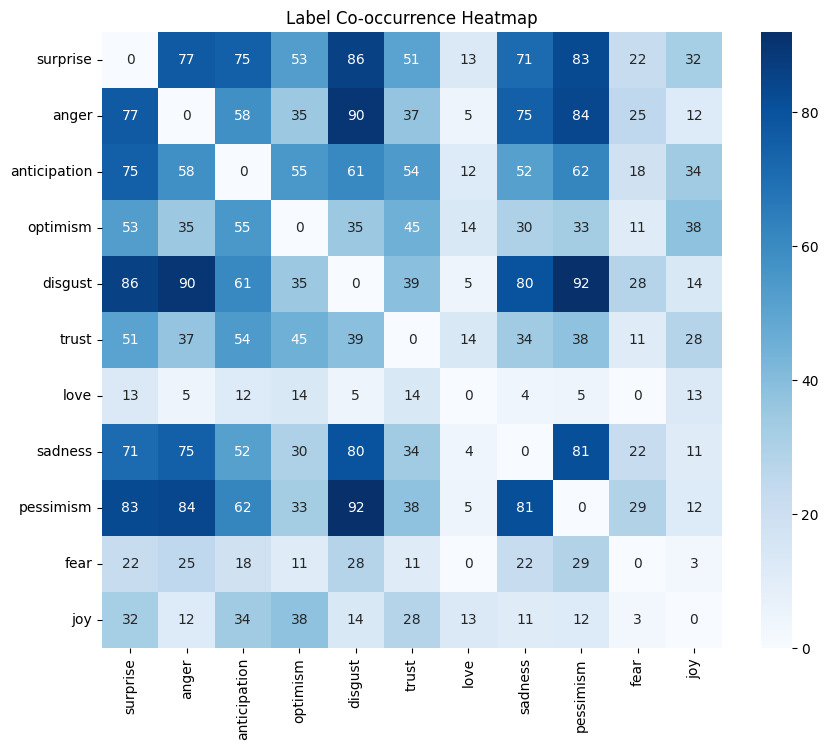

In [13]:
all_labels = list(set(itertools.chain(*merged_df['top_3_labels_roberta_base'].values,
                                     *merged_df['top_3_labels_roberta_large'].values,
                                     *merged_df['top_3_labels_bart'].values,
                                     *merged_df['top_3_labels_deberta_xnli'].values,
                                     *merged_df['top_3_labels_deberta_zero'].values)))

# Create an empty co-occurrence matrix (DataFrame)
co_occurrence_matrix = pd.DataFrame(0, index=all_labels, columns=all_labels)

# Fill the matrix with co-occurrence counts
for pair, count in co_occurrence.items():
    label1, label2 = tuple(pair)
    co_occurrence_matrix.loc[label1, label2] = count
    co_occurrence_matrix.loc[label2, label1] = count

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Blues", fmt='g')
plt.title('Label Co-occurrence Heatmap')
plt.show()

In [15]:
emotion_mapping = {
    "anger": "anger",
    "anticipation": "joy", 
    "disgust": "disgust",
    "fear": "fear",
    "joy": "joy",
    "love": "joy",           
    "optimism": "joy",       
    "pessimism": "fear",     
    "sadness": "sadness",
    "surprise": "surprise",
    "trust": "joy"           
}

In [16]:
merged_df['ekman_emotions'] = merged_df['manual_label'].map(emotion_mapping)

In [17]:
merged_df['ekman_emotions']

0        anger
1      sadness
2        anger
3      disgust
4      disgust
        ...   
190        joy
191        joy
193    disgust
194      anger
195      anger
Name: ekman_emotions, Length: 135, dtype: object

In [18]:
def map_first_emotion(emotion_tuple):
    first_emotion = emotion_tuple[0] 
    return emotion_mapping.get(first_emotion, None)  

In [19]:
merged_df['ekman_roberta_base'] = merged_df['top_3_labels_roberta_base'].apply(map_first_emotion)
merged_df['ekman_roberta_large'] = merged_df['top_3_labels_roberta_large'].apply(map_first_emotion)

In [20]:
merged_df.head(3)

,id,manual_label,index,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,...,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero,ekman_emotions,ekman_roberta_base,ekman_roberta_large
0,1099142075642068992,anger,7066,1099140102616465409,2019-02-23 03:01:06+00:00,the adults putting her and the kids in this sp...,Sen. Dianne Feinstein clashed with children ov...,en,0.907013,anger,...,"(0.9955814480781555, 0.9739786386489868, 0.073...","(surprise, anger, pessimism)","(0.6964385509490967, 0.6290321946144104, 0.568...","(disgust, anger, sadness)","(0.8640115261077881, 0.8347811102867126, 0.538...","(anger, disgust, pessimism)","(0.8989896178245544, 0.7550731897354126, 0.585...",anger,anger,anger
1,1096515259806949378,sadness,1135,1096476267866742786,2019-02-15 21:03:04+00:00,it is known to depress iq in those poisoned by it,London's finest have started arresting childre...,en,0.873381,sadness,...,"(0.9126311540603638, 0.8042817711830139, 0.495...","(pessimism, surprise, sadness)","(0.8416218161582947, 0.6525675058364868, 0.645...","(sadness, pessimism, disgust)","(0.998650312423706, 0.9984588623046875, 0.9829...","(sadness, pessimism, disgust)","(0.9077954292297363, 0.6509696245193481, 0.351...",sadness,sadness,sadness
2,1100372212794699782,anger,10374,1100154569663733760,2019-02-26 12:29:14+00:00,i think almost everyone has woken up to the fa...,"In new Pew Poll, climate change falls to the b...",en,0.876844,anger,...,"(0.9928029179573059, 0.9910215735435486, 0.154...","(pessimism, disgust, trust)","(0.8058627843856812, 0.6137633323669434, 0.228...","(disgust, anger, sadness)","(0.996616005897522, 0.9013699889183044, 0.8693...","(disgust, pessimism, anger)","(0.9593385457992554, 0.9299222230911255, 0.423...",anger,anger,anger


In [21]:
def exact_match(row, col):
    return row['ekman_emotions'] == row[col]

In [22]:
merged_df.apply(exact_match, col='ekman_roberta_large', axis=1).value_counts()

True     97
False    38
Name: count, dtype: int64

In [23]:
merged_df.apply(exact_match, col='ekman_roberta_base', axis=1).value_counts()

True     93
False    42
Name: count, dtype: int64

In [25]:
bart_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=3)

/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
classification_results = []
for i in range(0, len(merged_df), 32):
    batch = merged_df['replies'][i:i + 32].tolist()
    outputs = bart_classifier(batch,
        candidate_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise"])
    classification_results.extend(outputs)


In [27]:
classification_results[3]

{'sequence': 'no carbon taxes in purgatory',
 'labels': ['surprise', 'disgust', 'sadness', 'fear', 'anger', 'joy'],
 'scores': [0.45736855268478394,
  0.24719439446926117,
  0.11876904219388962,
  0.08057661354541779,
  0.06625913083553314,
  0.029832283034920692]}

In [28]:
labels_col = [x['labels'][0] for x in classification_results]

merged_df['ekman_bart'] = labels_col

In [30]:
merged_df.apply(exact_match, col='ekman_bart', axis=1).value_counts()

False    103
True      32
Name: count, dtype: int64

In [31]:

deberta_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7", device=3)


/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
def data():
    for value in merged_df['replies'].to_list():
        yield value

In [33]:
classification_results = []
for text in data():
    result = deberta_classifier(
    text,
    candidate_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise"])
    classification_results.append(result)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [34]:
classification_results[0]

{'sequence': 'the adults putting her and the kids in this spot were jerks however her response of essentially not being able to do or try and get off the lawn is what is wiping out apathetic centrists from the party',
 'labels': ['disgust', 'anger', 'sadness', 'surprise', 'fear', 'joy'],
 'scores': [0.34897348284721375,
  0.25378572940826416,
  0.20079709589481354,
  0.11999626457691193,
  0.054157525300979614,
  0.02228989452123642]}

In [35]:
labels_col = [x['labels'][0] for x in classification_results]

merged_df['ekman_deberta_xnli'] = labels_col

In [36]:
merged_df.apply(exact_match, col='ekman_deberta_xnli', axis=1).value_counts()

False    101
True      34
Name: count, dtype: int64

In [37]:
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0", device=3)

In [38]:
def data():
    for value in merged_df['replies'].to_list():
        yield value

In [39]:
classification_results = []
for text in data():
    result = zeroshot_classifier(
    text,
    candidate_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise"])
    classification_results.append(result)

In [40]:
classification_results[0]

{'sequence': 'the adults putting her and the kids in this spot were jerks however her response of essentially not being able to do or try and get off the lawn is what is wiping out apathetic centrists from the party',
 'labels': ['anger', 'disgust', 'sadness', 'surprise', 'fear', 'joy'],
 'scores': [0.5519548654556274,
  0.3174276649951935,
  0.056698624044656754,
  0.04608463868498802,
  0.023358825594186783,
  0.004475374706089497]}

In [41]:
labels_col = [x['labels'][0] for x in classification_results]

merged_df['ekman_deberta_zero'] = labels_col

In [42]:
merged_df.apply(exact_match, col='ekman_deberta_zero', axis=1).value_counts()

False    70
True     65
Name: count, dtype: int64

In [43]:
merged_df.to_csv('/work/ptyagi/masterthesis/tmp/annotations_and_predictions.csv')

In [44]:
merged_df.head()

,id,manual_label,index,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,...,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero,ekman_emotions,ekman_roberta_base,ekman_roberta_large,ekman_bart,ekman_deberta_xnli,ekman_deberta_zero
0,1099142075642068992,anger,7066,1099140102616465409,2019-02-23 03:01:06+00:00,the adults putting her and the kids in this sp...,Sen. Dianne Feinstein clashed with children ov...,en,0.907013,anger,...,"(disgust, anger, sadness)","(0.8640115261077881, 0.8347811102867126, 0.538...","(anger, disgust, pessimism)","(0.8989896178245544, 0.7550731897354126, 0.585...",anger,anger,anger,surprise,disgust,anger
1,1096515259806949378,sadness,1135,1096476267866742786,2019-02-15 21:03:04+00:00,it is known to depress iq in those poisoned by it,London's finest have started arresting childre...,en,0.873381,sadness,...,"(sadness, pessimism, disgust)","(0.998650312423706, 0.9984588623046875, 0.9829...","(sadness, pessimism, disgust)","(0.9077954292297363, 0.6509696245193481, 0.351...",sadness,sadness,sadness,surprise,sadness,sadness
2,1100372212794699782,anger,10374,1100154569663733760,2019-02-26 12:29:14+00:00,i think almost everyone has woken up to the fa...,"In new Pew Poll, climate change falls to the b...",en,0.876844,anger,...,"(disgust, anger, sadness)","(0.996616005897522, 0.9013699889183044, 0.8693...","(disgust, pessimism, anger)","(0.9593385457992554, 0.9299222230911255, 0.423...",anger,anger,anger,surprise,disgust,disgust
3,1099110064735047681,disgust,6969,1099095683045429250,2019-02-23 00:53:54+00:00,no carbon taxes in purgatory,hmm i thought i supported doing whatever it ta...,en,0.975051,disgust,...,"(anticipation, optimism, sadness)","(0.7585768103599548, 0.6599399447441101, 0.645...","(surprise, pessimism, anticipation)","(0.2936857342720032, 0.1840580552816391, 0.055...",disgust,disgust,sadness,surprise,anger,surprise
4,1098006647228706816,disgust,4210,1097698843997552641,2019-02-19 23:49:19+00:00,god i thought our opposition in was bad how mu...,"I accept the science of climate change, so doe...",en,0.877320,anger,...,"(pessimism, anticipation, disgust)","(0.9972473382949829, 0.9689959287643433, 0.965...","(anger, disgust, pessimism)","(0.9985408782958984, 0.9961930513381958, 0.826...",disgust,anger,disgust,surprise,sadness,anger


In [45]:
accuracy_scores = {}

columns_to_compare = [
    'ekman_roberta_base', 
    'ekman_roberta_large', 
    'ekman_bart', 
    'ekman_deberta_xnli', 
    'ekman_deberta_zero'
]

for column in columns_to_compare:

    accuracy = (merged_df['ekman_emotions'] == merged_df[column]).mean()
    accuracy_scores[column] = accuracy

for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.2%}")

ekman_roberta_base: 68.89%
ekman_roberta_large: 71.85%
ekman_bart: 23.70%
ekman_deberta_xnli: 25.19%
ekman_deberta_zero: 48.15%


In [15]:
df = pd.read_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [19]:
df.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [20]:
df.to_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv', index='Unnamed: 0')

In [21]:
n = 20

filtered_df = df[df['replies'].str.len() > n]

sampled_df = filtered_df.sample(100, random_state=7)

In [23]:
sampled_df.to_csv('/work/ptyagi/masterthesis/tmp/new_annotation.csv', index=True)